In [1]:
pip cache purge

Files removed: 1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install numpy==1.24.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Aditi 732\Downloads\archive (1)\creditcard.csv")

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data = df

In [7]:
# Check for missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values in our dataframe

## Dataset Information

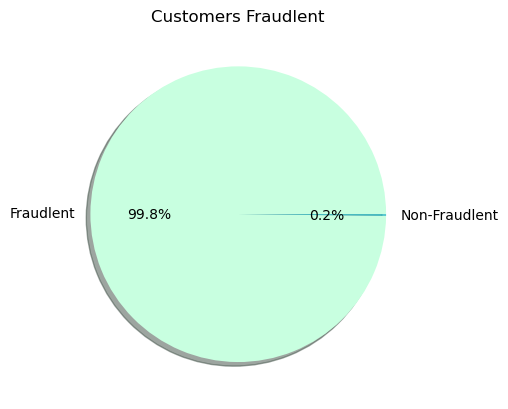

In [8]:
# Fraudlent Customers in percentage form

labels = ['Fraudlent','Non-Fraudlent']

plt.title('Customers Fraudlent')
data['Class'].value_counts().plot(kind='pie',labels=labels,autopct='%1.1f%%',shadow=True, colors=['#C8FFE0','#33BBC5'])
plt.ylabel(' ')

plt.show()

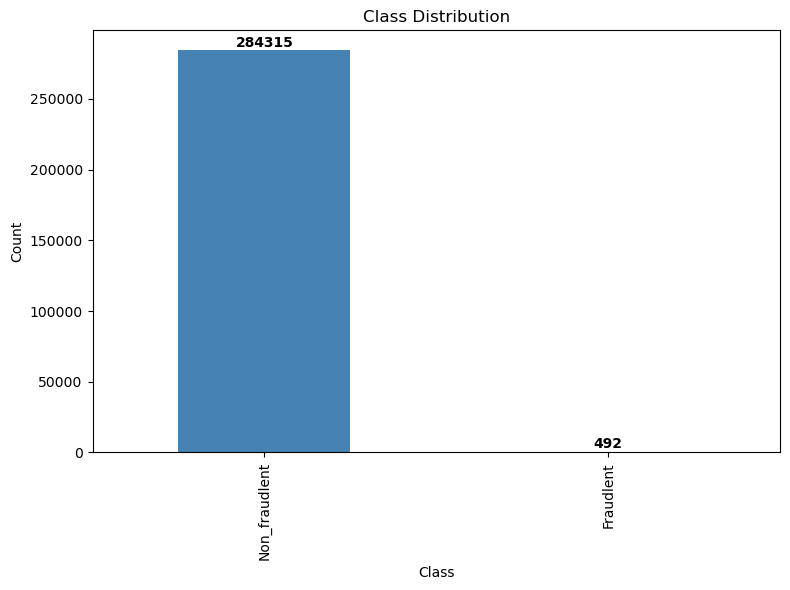

In [9]:
# Count of Fraudlent customers into bar graph

# Calculate the class distribution
class_distribution = data['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8,6))
ax = class_distribution.plot(kind = 'bar', color = 'steelblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Non_fraudlent','Fraudlent'])
plt.title('Class Distribution')

# Add values on top of the bar
for i,count in enumerate(class_distribution):
    plt.text(i , count+500, str(count), ha= 'center', va ='bottom', fontweight ='bold')

plt.tight_layout()
plt.show()

## Check for Duplicate Values

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [11]:
print('Number of duplicate values in a dataset : ', data.duplicated().sum())

Number of duplicate values in a dataset :  1081


In [12]:
# Get the fraud and the normal dataset
fraud = data[data['Class']== 1]

normal = data[data['Class']== 0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


## Dividing the dataset

In [14]:
# Creating Independent and Dependent Features 
columns = data.columns.tolist()
columns = [c for c in columns if c not in["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low = 0, high=1, size=(X.shape[0],X.shape[1]))

#Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Handling Imbalanced Dataset

In [15]:
from imblearn.under_sampling import NearMiss

In [16]:
# Implementing Under Sampling to handle Imbalanced Dataset
nm = NearMiss()
X_res,y_res = nm.fit_resample(X,Y)

In [17]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [18]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(Y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

Original dataset shapeCounter({0: 284315, 1: 492})
Resampled dataset shapeCounter({0: 492, 1: 492})


## Hence now the dataset is balanced with 50% of both fraudlent and non-fraudlent data

## Descriptive Statistics

In [ ]:
# Seperate statistics for fraudlent and non-fraudlent transactions
fraudlent_transactions = data[data['Class'] == 1]
non_fraudlent_transactions = data[data['Class'] == 0]

# Descriptive Statitics for fraudlent transactions
fraudlent_stats = fraudlent_transactions['Amount'].describe()
print(fraudlent_stats)

In [ ]:
# Descriptive Statistics for Non-Fraudlent transactions
non_fraudlent_stats = non_fraudlent_transactions['Amount'].describe()
print(non_fraudlent_stats)

In [ ]:
# Overall Statistical summary

col_stats = data[['Amount','Time','Class']]
cmap1 = 'Blues'

def desc_stats(dataframe):
    desc = dataframe.describe()
    f, ax = plt.subplots(figsize=(10 , desc.shape[0] *0.75 ))
    
    sns.heatmap(desc , annot = True , cmap = cmap1, fmt = '.2f', ax = ax , linecolor = 'white', linewidths = 1.3, cbar = False)
    plt.xticks(size = 14)
    plt.yticks(size = 12)
    plt.title('Descriptive Statistics')
    
desc_stats(col_stats)

In [ ]:
# Convert time column into days

time_days = data['Time'] / (3600*24)

# Group transaction amounts by time (days) and calculate the average
average_amounts = data.groupby(time_days)['Amount'].mean()

# Get our data into line chart
plt.figure(figsize=(12,6))
plt.plot(average_amounts.index ,average_amounts.values , color='#EDB7ED')
plt.xlabel('Time in days')
plt.ylabel('Average Amount')
plt.title('Average Transaction amount over time(days)')

plt.show()

In [ ]:
# Convert the time time dataset into weeks
time_weeks = data['Time'] / (3600*24*7)

# Group the time data and then calculate the average transaction 
average_amount_week = data.groupby(time_weeks)['Amount'].mean()
    
# Line Plot
plt.figure(figsize=(12,6))
plt.plot(average_amount_week.index , average_amount_week.values, color ='#82A0D8')
plt.xlabel('Time in weeks')
plt.ylabel('Average Amount')
plt.title('Average Amount over time(Weeks)')

plt.show()

## Time pattern

In [ ]:
# Convert the time columns into datetime one
data['Time'] = pd.to_datetime(data['Time'] , unit ='s' )

# Extract hour and day of the week
data['Hour'] = data['Time'].dt.hour
data['DayofWeek'] = data['Time'].dt.dayofweek

# Group fraudlent and non-fraudlent transactions by hour and day of the week
fraud_transactions = data[data['Class'] == 0]
non_fraud_transactions = data[data['Class'] == 1]

fraudlent_counts_hour = fraud_transactions.groupby('Hour').size()
non_fraudlent_counts_hour = non_fraud_transactions.groupby('Hour').size()

# Grouping the transactions by day of the week
fraudlent_counts_day = fraud_transactions.groupby('DayofWeek').size()
non_fraudlent_counts_day = non_fraud_transactions.groupby('DayofWeek').size()

#Plot the graph 
plt.figure(figsize=(12,6))
plt.subplot(2, 1 ,1)
plt.plot(fraudlent_counts_hour.index , fraudlent_counts_hour.values , color = '#BC7AF9', label = 'Fraudlent')
plt.plot(non_fraudlent_counts_hour.index, non_fraudlent_counts_hour.values, color ='#FFA1F5', label = 'Non_fraudlent')
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Transactions')
plt.title('Patterns of Fraudlent and Non-fraudlent trasactions by hour')
plt.legend()
plt.show()

In [ ]:
plt.subplot(2, 1 , 2)
plt.plot(fraudlent_counts_day.index , fraudlent_counts_day.values, color ='#793FDF', label = 'Fraudlent')
plt.plot(non_fraudlent_counts_day.index, non_fraudlent_counts_day.values, color='#7091F5' , label = 'Non-Fraudlent')
plt.xlabel('Day of the week')
plt.ylabel('Number of transactions')
plt.title('Patterns of Fraudlent and Non-fraudlent trasactions by Days of the week')
plt.xticks(range(7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.show()

## Feature Analysis

In [ ]:
# Selecting the PCA transformed features and class
features = data.iloc[: , 1:29]
class_labels = data['Class']

# Calculate the correlation matrix 
correlation_matrix = pd.concat([features, class_labels], axis = 1).corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap = 'Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title(' PCA transformed features VS Transaction Class')
plt.show()

In [ ]:
# Select the features required for histogram
selected_features = ['V4', 'V10', 'V14', 'V17']
selected_data = data[selected_features + ['Class']]

# Visualize the distributions and relations with historgram
plt.figure(figsize = (12,8))
for i, feature in enumerate(selected_features):
    plt.subplot(2 , 2 , i+1 )
    sns.histplot(data = selected_data , x=feature, hue ='Class', kde = True ,multiple = 'stack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
plt.tight_layout()    
plt.show()

In [ ]:
# Selection trasaction amounts for fradulent and non-fraudlent trasactions
fraudlent_transactions = data[data['Class']== 1]['Amount']
non_fraudlent_transactions = data[data['Class']== 0]['Amount']

# Create a boxplot to check the outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='Class',y= 'Amount',data=data)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Comparison of transactions : Fraud VS Non-Fraud')
plt.xticks([0,1],['Non-Fraud','Fraud'])

plt.show()

## Hypothesis testing

In [ ]:
from scipy import stats

# Selection trasaction amounts for fradulent and non-fraudlent trasactions
fraudlent_transactions = data[data['Class']== 1]['Amount']
non_fraudlent_transactions = data[data['Class']== 0]['Amount']

# Perform hypothesis testing 
t_statistic , p_value = stats.ttest_ind(fraudlent_transactions, non_fraudlent_transactions, equal_var = False)

# Performing z-score test
z_scores = (fraudlent_transactions - np.mean(non_fraudlent_transactions)) / np.std(non_fraudlent_transactions)

# Calculate percentiles for given amount
fraudlent_percentiles = np.percentile(fraudlent_transactions, [25,50,75])

# Calculated standard deviation for each transaction
std_fraud = np.std(fraudlent_transactions)
std_non_fraud = np.std(non_fraudlent_transactions)

# Print the results
print('Hypothesis Testing (t_test) - T-statistic :', t_statistic)
print('Hypothesis Testing(t_test) - p-value :', p_value)
print('Z-scores for fraudlent transactions :', z_scores)
print('Fraudlent transactions amount percentiles(25th , 50th , 75th) :', fraudlent_percentiles)
print('Standard Deviation - Fraudlent transactions :', std_fraud)
print('Standard Deviation - Non Fraudlent transactions : ', std_non_fraud)

## Identify patterns or anamolies in the anonymized features

In [ ]:
# Examine feature distributions

data.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [ ]:
# Identify Outliers using boxplot

plt.figure(figsize=(20 , 10))
data.boxplot()
plt.xticks(rotation = 90)

plt.show()

## Machine Learning Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into test and training features 
X_train , X_test , y_train , y_test = train_test_split(X_res, y_res , test_size = 0.2 , random_state = 42)

In [20]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

accuracy = accuracy_score(y_test , y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)

In [24]:
print(f"Model:{model.__class__.__name__}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(f"Accuracy: {accuracy}")
print("----------------------------------")

Model:LogisticRegression
Confusion Matrix:
[[97  2]
 [ 8 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Accuracy: 0.949238578680203
----------------------------------


## Decision Tree Classifier

In [25]:
classifier = DecisionTreeClassifier()

In [26]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# Predicting the test result set
y_pred1 = classifier.predict(X_test)
y_pred1

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [28]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred1)
accuracy_dt = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1)

In [29]:
# Printing results
cm
accuracy_dt

0.9543147208121827

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make Predictions
y_pred2 = model.predict(X_test)

In [36]:
# Evaluating the model 
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Classification Report:\n",classification_report(y_test,y_pred2))

Accuracy: 0.9593908629441624
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

